In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np

In [36]:
data_all = "Output/2019_2020_mixed_beverage"
file_path2 = "Output/Dallas_metro_unemployment.csv"


df_all = pd.read_csv(data_all, encoding="utf-8")
df2 = pd.read_csv(file_path2, encoding="utf-8")


In [3]:
#efficient way to extract year from string format date
df_all['year'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).year
df_all['month'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).month
city_mask = (df_all.location_city == "HOUSTON")|(df_all.location_city == "DALLAS")|(df_all.location_city == "FORT WORTH")|(df_all.location_city == "SAN ANTONIO")|(df_all.location_city == "AUSTIN")
dfcities = df_all[city_mask]
dfcities

,taxpayer_number,taxpayer_name,taxpayer_address,taxpayer_city,taxpayer_state,taxpayer_zip,taxpayer_county,location_number,location_name,location_address,...,responsibility_begin_date_yyyymmdd,obligation_end_date_yyyymmdd,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts,responsibility_end_date_yyyymmdd,year,month
3,32054228120,S & KW CORPORATION,6617 CHIMNEY ROCK RD,HOUSTON,TX,77081.0,101,1,NAZARETH CAFE,6617 CHIMNEY ROCK RD,...,2014-08-01T00:00:00.000,2019-01-31T00:00:00.000,3212,0,2509,0,5721,NaN,2019,1
4,32000861685,"FOUNTAIN FOODS, INC.",25600 WESTHEIMER PKWY STE 110,KATY,TX,77494.0,79,2,HARVEST ORGANIC GRILLE,1810 FOUNTAIN VIEW DR,...,2012-08-21T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-06-01T00:00:00.000,2019,1
5,17526234541,"THE KING LOUNGE, INC.",3684 ASBURY ST,DALLAS,TX,75205.0,57,1,THE KING LOUNGE INC,1602 MARKET CENTER BLVD,...,1996-02-15T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-01-16T00:00:00.000,2019,1
10,32061761998,WICKED WINGS LLC,615 W SLAUGHTER LN STE 108,AUSTIN,TX,78748.0,227,2,BUCKET'S BACKYARD BAR AND GRILL,9900 S INTERSTATE 35 BLDG M STE 200,...,2017-03-17T00:00:00.000,2019-01-31T00:00:00.000,8777,215,15076,0,24068,2019-09-09T00:00:00.000,2019,1
12,32059688088,"RICHMOND MIA BELLA, LLC",19 MAYMONT WAY,SPRING,TX,77382.0,170,1,MIA BELLA TRATTORIA,3773 RICHMOND AVE STE 1A,...,2017-05-09T00:00:00.000,2019-01-31T00:00:00.000,12965,25073,2298,0,40336,2019-06-13T00:00:00.000,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119989,32055936457,"CAFI TOULOUSE RIVER OAKS DISTRICT, LP",3100 MONTICELLO AVE STE 325,DALLAS,TX,75205.0,57,1,CAFE TOULOUSE,4444 WESTHEIMER RD STE E100,...,2015-05-29T00:00:00.000,2020-12-31T00:00:00.000,178933,206491,8562,0,393986,NaN,2020,12
119990,17215567953,"FUN AND SPIRITS, INC.",223 W RHAPSODY DR,SAN ANTONIO,TX,78216.0,15,1,CROSS-EYED SEAGULL,19141 STONE OAK PKWY # 206,...,2004-12-27T00:00:00.000,2020-12-31T00:00:00.000,35832,20,13969,0,49821,NaN,2020,12
119994,32070563070,KAPRI ULTRA LOUNGE LLC,6239 WARWICK GARDEN LN,SPRING,TX,77379.0,101,1,KAPRI ULTRA LOUNGE,5718 FAIRDALE LN,...,2019-08-21T00:00:00.000,2020-12-31T00:00:00.000,37373,232,369,0,37974,NaN,2020,12
119996,17430007959,"SJ2 RESTAURANT GROUP, LLC",PO BOX 100510,SAN ANTONIO,TX,78201.0,15,7,JARDIN,555 FUNSTON PL,...,2020-09-15T00:00:00.000,2020-12-31T00:00:00.000,20277,29423,1680,0,51380,NaN,2020,12


In [4]:
mask = dfcities.location_city == "DALLAS"
dfdallas = dfcities.loc[mask]
dallas_sales = dfdallas.groupby(['year','month'])['total_receipts'].sum().reset_index()
dallas_sales2=pd.merge(dallas_sales,df2,on=['year','month'],how='left')
dallas_sales2.corr()

,year,month,total_receipts,Unemployment Rate
year,1.000000e+00,7.884865e-14,-0.816382,0.672858
month,7.884865e-14,1.000000e+00,-0.108216,0.055690
total_receipts,-8.163819e-01,-1.082156e-01,1.000000,-0.874869
Unemployment Rate,6.728577e-01,5.569007e-02,-0.874869,1.000000


<ipython-input-5-3db3b51e1767>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rotation=45,labels=dallas_sales2.Date)


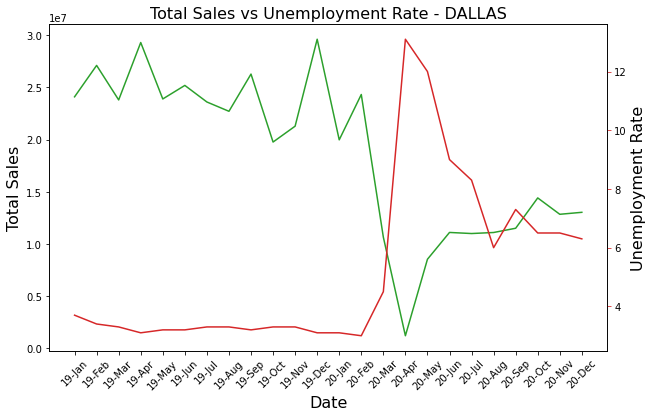

In [5]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Total Sales vs Unemployment Rate - DALLAS', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Total Sales', fontsize=16)
ax1 = sn.lineplot(x= 'Date', y='total_receipts', data = dallas_sales2, sort=False, color=color)
ax1.tick_params(axis='y')
# specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Unemployment Rate', fontsize=16)
ax2 = sn.lineplot(x='Date', y='Unemployment Rate', data=dallas_sales2, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#rotate tick labels
ax1.set_xticklabels(rotation=45,labels=dallas_sales2.Date)
#show plot
plt.show()


In [6]:
#2019-2020 sales per capita 
city_sales = dfcities.groupby('location_city')['total_receipts'].sum().reset_index()
city_sales
city_pop = [978908,1343573, 874401,2320268,1547253]
city_sales['population']=city_pop
city_sales['sales_per_capita'] = city_sales.total_receipts/city_sales.population
city_sales['Sales Ranking'] = city_sales.total_receipts.rank(ascending=False)
city_sales['Sales per Capita Ranking'] = city_sales.sales_per_capita.rank(ascending=False)
city_sales

,location_city,total_receipts,population,sales_per_capita,Sales Ranking,Sales per Capita Ranking
0,AUSTIN,410293324,978908,419.133692,3.0,1.0
1,DALLAS,446286693,1343573,332.164083,2.0,2.0
2,FORT WORTH,150646054,874401,172.284860,5.0,5.0
3,HOUSTON,586858982,2320268,252.927240,1.0,3.0
4,SAN ANTONIO,309296894,1547253,199.900659,4.0,4.0


In [7]:
#2019 sales per capita 
mask_2019 = dfcities.year == 2019
dfcities2019 = dfcities.loc[mask_2019]
citysales2019 = dfcities2019.groupby('location_city')['total_receipts'].sum().reset_index()
city_pop = [978908,1343573, 874401,2320268,1547253]
citysales2019['population']=city_pop
citysales2019['sales_per_capita'] = citysales2019.total_receipts/citysales2019.population
citysales2019['Sales Ranking'] = citysales2019.total_receipts.rank(ascending=False)
citysales2019['Sales per Capita Ranking'] = citysales2019.sales_per_capita.rank(ascending=False)
citysales2019


,location_city,total_receipts,population,sales_per_capita,Sales Ranking,Sales per Capita Ranking
0,AUSTIN,289090039,978908,295.318905,3.0,1.0
1,DALLAS,296571594,1343573,220.733517,2.0,2.0
2,FORT WORTH,91968396,874401,105.178741,5.0,5.0
3,HOUSTON,384811690,2320268,165.847949,1.0,3.0
4,SAN ANTONIO,200066163,1547253,129.304104,4.0,4.0


In [8]:
#2020 sales per capita 
mask_2020 = dfcities.year == 2020
dfcities2020 = dfcities.loc[mask_2020]
citysales2020 = dfcities2020.groupby('location_city')['total_receipts'].sum().reset_index()
city_pop = [978908,1343573, 874401,2320268,1547253]
citysales2020['population']=city_pop
citysales2020['sales_per_capita'] = citysales2020.total_receipts/citysales2020.population
citysales2020['Sales Ranking'] = citysales2020.total_receipts.rank(ascending=False)
citysales2020['Sales per Capita Ranking'] = citysales2020.sales_per_capita.rank(ascending=False)
citysales2020['per_cap_yoy_diff'] = citysales2020.sales_per_capita - citysales2019.sales_per_capita
citysales2020['diff%'] = citysales2020.sales_per_capita/citysales2019.sales_per_capita-1
citysales2020

,location_city,total_receipts,population,sales_per_capita,Sales Ranking,Sales per Capita Ranking,per_cap_yoy_diff,diff%
0,AUSTIN,121203285,978908,123.814786,3.0,1.0,-171.504119,-0.580742
1,DALLAS,149715099,1343573,111.430565,2.0,2.0,-109.302952,-0.495181
2,FORT WORTH,58677658,874401,67.106120,5.0,5.0,-38.072621,-0.361980
3,HOUSTON,202047292,2320268,87.079291,1.0,3.0,-78.768659,-0.474945
4,SAN ANTONIO,109230731,1547253,70.596555,4.0,4.0,-58.707549,-0.454027


In [9]:
storesales2019 = dfcities2019.groupby(['location_name','location_address'])['total_receipts'].sum().reset_index()
storesales2019.head(20)

,location_name,location_address,total_receipts
0,'PEPPER TWINS',315 FAIRVIEW AVE,517
1,'SAMMY'S' ON THE LAKE,6680 PEDEN RD,44981
2,"(CHRP, LLC) DRAKE'S DALLAS",5007 W LOVERS LN,276879
3,042 LOUNGE,13711 WESTHEIMER RD STE B1,15289
4,100% TAQUITO CO,3245 SOUTHWEST FWY,114696
5,12 CUTS STEAK HOUSE,18010 DALLAS PKWY,20660
6,"1424A WESTHEIMER BAR GROUP, L.L.C.",1424A WESTHEIMER RD,134086
7,1820,1820 FRANKLIN ST,218306
8,18TH & VINE BARBEQUE,2511 THROCKMORTON ST,86044
9,2-A-DAYS,10555 PEARLAND PKWY STE G,209752


In [10]:
storesales2020 = dfcities2020.groupby(['location_name','location_address'])['total_receipts'].sum().reset_index()
storesales2020.head(20)

,location_name,location_address,total_receipts
0,'PEPPER TWINS',315 FAIRVIEW AVE,13
1,'SAMMY'S' ON THE LAKE,6680 PEDEN RD,27784
2,"(CHRP, LLC) DRAKE'S DALLAS",5007 W LOVERS LN,616621
3,042 LOUNGE,13711 WESTHEIMER RD STE B1,2850
4,100% TAQUITO CO,3245 SOUTHWEST FWY,62533
5,12 CUTS STEAK HOUSE,18010 DALLAS PKWY,53412
6,1751 SEA AND BAR,191 HEIGHTS BLVD,88678
7,1820,1820 FRANKLIN ST,8353
8,18TH & VINE BARBEQUE,2511 THROCKMORTON ST,84041
9,1919,1420 S ALAMO ST STE 1,0


In [11]:
mask_not0 = storesales2019.total_receipts > 0
mask_0 = storesales2019.total_receipts == 0
storesales2019_clean = storesales2019.loc[mask_not0]
storesales2019_0 = storesales2019.loc[mask_0]
total_stores_19 = storesales2019.index.nunique()
stores_w_sales_19 = storesales2019_clean.index.nunique()
stores_wo_sales_19 = storesales2019_0.index.nunique()
per_no_sales_19 = stores_wo_sales_19/total_stores_19
per_no_sales_19

0.07892204042348412

In [22]:
storesales2020_clean.sort_values('total_receipts',ascending=True).head(20).reset_index()

,index,location_name,location_address,total_receipts
0,5246,THOUSAND OAKS CAFE,12930 JONES MALTSBERGER RD STE 103,1
1,1125,CHIPOTLE MEXICAN GRILL,8505 S MAIN ST STE 100,4
2,2708,LA BABY BAR,1611 DUNGAN LN,5
3,0,'PEPPER TWINS',315 FAIRVIEW AVE,13
4,1212,"CITYVIEW BEVERAGE MANAGEMENT, LLC",5900 CITYVIEW BLVD,16
5,1137,CHIPOTLE MEXICAN GRILL #3551,407 W LOOP 1604 S STE 101,19
6,2864,LEMOND CATERING & SPECIAL EVENTS,612 ARCHER ST,24
7,1098,CHIPOTLE MEXICAN GRILL,18152 PRESTON RD STE I-1,31
8,1092,CHIPOTLE MEXICAN GRILL,11613 N CENTRAL EXPY STE 100,37
9,1113,CHIPOTLE MEXICAN GRILL,4727 MEDICAL DR,43


In [18]:
mask2_not0 = storesales2020.total_receipts > 0
mask2_0 = storesales2020.total_receipts == 0
storesales2020_clean = storesales2020.loc[mask2_not0]
storesales2020_0 = storesales2020.loc[mask2_0]
total_stores_20 = storesales2020.index.nunique()
stores_w_sales_20 = storesales2020_clean.index.nunique()
stores_wo_sales_20 = storesales2020_0.index.nunique()
per_no_sales_20 = stores_wo_sales_20/total_stores_19
per_no_sales_20

0.1803657362848893

In [34]:
#includes stores with zero sales
stores_ = pd.merge(storesales2019,storesales2020,on=['location_name','location_address'],how='inner')
stores_all = stores_.rename(columns={'total_receipts_x': '2019 Sales','total_receipts_y': '2020 Sales'})
stores_all['2019 Rank'] = stores_all['2019 Sales'].rank(ascending=False)
stores_all['2020 Rank'] = stores_all['2020 Sales'].rank(ascending=False)
stores_all['\u0394 Sales'] = stores_all['2020 Sales']-stores_all['2019 Sales']
stores_all['\u0394 Sales%'] = stores_all['2020 Sales']/stores_all['2019 Sales']-1
stores_all['\u0394 Rank'] = stores_all['2020 Rank']-stores_all['2019 Rank']
stores_all.sort_values('\u0394 Sales%',ascending=True).head(20).reset_index()
stores_all_new = pd.merge(stores_all,dfcities[['location_name','location_address','location_city']].drop_duplicates(),on=['location_name','location_address'],how='inner')
stores_all_new


,location_name,location_address,2019 Sales,2020 Sales,2019 Rank,2020 Rank,Δ Sales,Δ Sales%,Δ Rank,location_city
0,'PEPPER TWINS',315 FAIRVIEW AVE,517,13,4358.5,4123.0,-504,-0.974855,-235.5,HOUSTON
1,'SAMMY'S' ON THE LAKE,6680 PEDEN RD,44981,27784,3125.0,2781.0,-17197,-0.382317,-344.0,FORT WORTH
2,"(CHRP, LLC) DRAKE'S DALLAS",5007 W LOVERS LN,276879,616621,1260.0,177.0,339742,1.227041,-1083.0,DALLAS
3,042 LOUNGE,13711 WESTHEIMER RD STE B1,15289,2850,3746.0,3825.5,-12439,-0.813591,79.5,HOUSTON
4,100% TAQUITO CO,3245 SOUTHWEST FWY,114696,62533,2218.0,2058.0,-52163,-0.454794,-160.0,HOUSTON
...,...,...,...,...,...,...,...,...,...,...
4691,ZIO CECIO CUCINA ITALIANA,4615 W LOVERS LN,92373,66229,2446.0,2006.0,-26144,-0.283026,-440.0,DALLAS
4692,ZIZIKI'S,11661 PRESTON RD STE 309,50522,17319,3038.0,3119.0,-33203,-0.657199,81.0,DALLAS
4693,ZOCALO MIO LLC,175 E HOUSTON ST STE 115,5918,0,4031.0,4411.5,-5918,-1.000000,380.5,SAN ANTONIO
4694,ZOLI'S NY PIZZA TAVERN,3501 HULEN ST,37404,173399,3266.0,983.0,135995,3.635841,-2283.0,FORT WORTH


In [30]:
#excludes stores that had zero sales
stores_2 = pd.merge(storesales2019_clean,storesales2020_clean,on=['location_name','location_address'],how='inner')
stores_all2 = stores_2.rename(columns={'total_receipts_x': '2019 Sales','total_receipts_y': '2020 Sales'})
stores_all2['2019 Rank'] = stores_all2['2019 Sales'].rank(ascending=False)
stores_all2['2020 Rank'] = stores_all2['2020 Sales'].rank(ascending=False)
stores_all2['\u0394 Sales'] = stores_all2['2020 Sales']-stores_all2['2019 Sales']
stores_all2['\u0394 Sales%'] = stores_all2['2020 Sales']/stores_all2['2019 Sales']-1
stores_all2['\u0394 Rank'] = stores_all2['2020 Rank']-stores_all2['2019 Rank']
stores_all2.sort_values('2019 Rank',ascending=True).head(20).reset_index()

,index,location_name,location_address,2019 Sales,2020 Sales,2019 Rank,2020 Rank,Δ Sales,Δ Sales%,Δ Rank
0,2972,"SALC, INC.",2201 N STEMMONS FWY FL 1,8853807,1865625,1.0,9.0,-6988182,-0.789286,8.0
1,3989,WLS BEVERAGE CO,110 E 2ND ST,7584725,2241942,2.0,6.0,-5342783,-0.704414,4.0
2,1519,"HAPPIEST HOUR, LLC",2616 OLIVE ST,7258441,638749,3.0,162.0,-6619692,-0.911999,159.0
3,1047,DFB CAPITAL LLC,3127 ROUTH ST,5642420,2371351,4.0,5.0,-3271069,-0.579728,1.0
4,2421,NICK & SAM'S STEAK & FISH HOUSE,3008 MAPLE AVE,4852111,3372066,5.0,1.0,-1480045,-0.305031,-4.0
5,1352,FOUR FAMILIES OF HOUSTON,7800 AIRPORT BLVD CENTRAL CONCOURSE,4571430,1745656,6.0,12.0,-2825774,-0.618138,6.0
6,3628,THE PALAZIO,501 E BEN WHITE BLVD,4041232,816816,7.0,83.0,-3224416,-0.797879,76.0
7,1271,ESCAPADE 2001 HOUSTON,11903 EASTEX FWY,3960304,461876,8.0,293.0,-3498428,-0.883374,285.0
8,2014,LEVY RESTAURANTS AT TOYOTA CENTER,1510 POLK ST,3722969,1087374,9.0,38.0,-2635595,-0.707928,29.0
9,311,BILLY BOB'S TEXAS,2520 RODEO PLZ,3712982,2543184,10.0,4.0,-1169798,-0.315056,-6.0


In [15]:
#how many stores had sales in 2019 but 0 in 2020
mask3 = (stores_all['2019 Sales']>100000) & (stores_all['2020 Sales']==0)
stores_all.loc[mask3]

,location_name,location_address,2019 Sales,2020 Sales,2019 Rank,2020 Rank,Δ Sales,Δ Sales%,Δ Rank
42,7 GRAND,405 E 7TH ST,1116775,0,198.0,4411.5,-1116775,-1.0,4213.5
56,A'S UP SPORTS LOUNGE,5518 W MILITARY DR # 20,198554,0,1646.0,4411.5,-198554,-1.0,2765.5
99,ALAMO DRAFTHOUSE CINEMA,1911 ALDRICH ST STE 120,354787,0,1026.0,4411.5,-354787,-1.0,3385.5
100,ALAMO DRAFTHOUSE CINEMA,2700 W ANDERSON LN STE 701,138067,0,2035.0,4411.5,-138067,-1.0,2376.5
103,ALAMO DRAFTHOUSE CINEMAS,618 NW LOOP 410 STE 307,315483,0,1124.0,4411.5,-315483,-1.0,3287.5
...,...,...,...,...,...,...,...,...,...
4572,WAXY O'CONNORS IRISH PUB LLC,234 RIVERWALK,238120,0,1443.0,4411.5,-238120,-1.0,2968.5
4605,WILD SALSA,300 THROCKMORTON ST STE 180,120399,0,2171.0,4411.5,-120399,-1.0,2240.5
4663,XOCHI,1777 WALKER ST STE A,1716233,0,76.0,4411.5,-1716233,-1.0,4335.5
4681,YUME @ GATE E10,"3950 S TERMINAL RD TERM E GATE 10, SPACE 72",377353,0,970.0,4411.5,-377353,-1.0,3441.5
